# These are the libs that will be used in the analysis of student scores
--> pandas
--> numpy
--> seaborn
--> matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Here I have used the pandas lib to read the csv file and then the .head() method to see the first five enteries.

In [2]:
df = pd.read_csv('students.csv')
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


#### df.describe() tells the min, max, count etc values to have the idea of the data.

In [10]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


##### now i will use df.isnull() to know how many columns dont have null enteries.

In [13]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

##### According the above values we can see that which of the column enteries are not null (e.g ParentMartialStatus) but the columns required to us are filled.

# Dropping the unnamed column

In [14]:
df = df.drop('Unnamed: 0', axis = 1)
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


##### Now we have removed the Unamed ( extra column )

# Gender Distribution

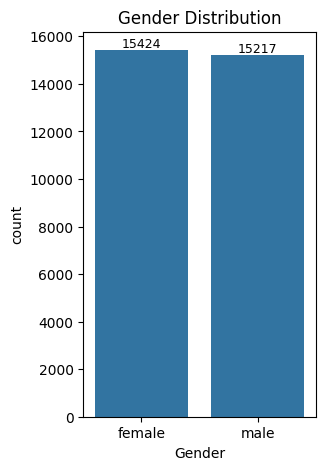

In [16]:
plt.figure(figsize=(3, 5))
ax = sns.countplot(data=df, x='Gender')
ax.bar_label(ax.containers[0], fontsize = 9)
plt.title('Gender Distribution')
plt.show()

## Analysis
### Based on the analysis, it's clear that there is a noticeable distinction between the number of females and males ( females are more than males )

# Impact of Parental Education on Student Performance

In [8]:
gb = df.groupby('ParentEduc').agg({'MathScore' : 'mean', 'WritingScore' : 'mean', 'ReadingScore' : 'mean'})
print(gb)

                    MathScore  WritingScore  ReadingScore
ParentEduc                                               
associate's degree  68.365586     70.299099     71.124324
bachelor's degree   70.466627     73.331069     73.062020
high school         64.435731     65.421136     67.213997
master's degree     72.336134     76.356896     75.832921
some college        66.390472     68.501432     69.179708
some high school    62.584013     63.632409     65.510785


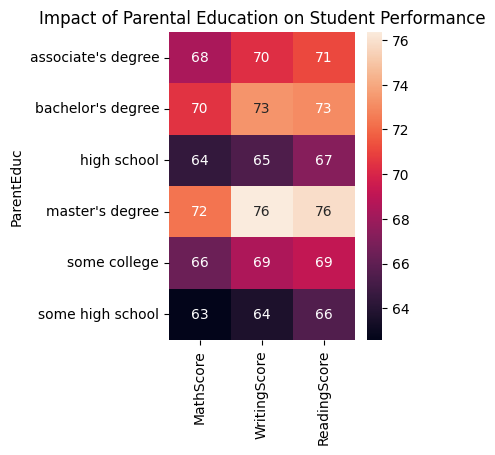

In [17]:
plt.figure(figsize=(3, 4))
sns.heatmap(gb, annot = True)
plt.title('Impact of Parental Education on Student Performance')
plt.show()

## Analysis 
### Students with parents holding an master's degree achieved the highest marks, while those whose parents completed some high school scored the lowest.

# Impact of Parent Martial Status on Student Performance

In [13]:
gb1 = df.groupby('ParentMaritalStatus').agg({'MathScore' : 'mean', 'WritingScore' : 'mean', 'ReadingScore' : 'mean'})
print(gb1)

                     MathScore  WritingScore  ReadingScore
ParentMaritalStatus                                       
divorced             66.691197     68.799146     69.655011
married              66.657326     68.420981     69.389575
single               66.165704     68.174440     69.157250
widowed              67.368866     68.563452     69.651438


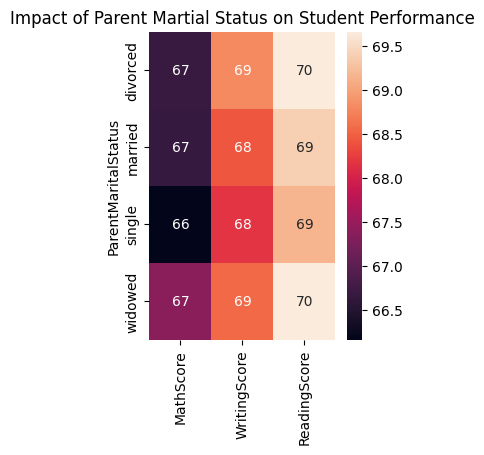

In [18]:
plt.figure(figsize=(3, 4))
sns.heatmap(gb1, annot = True)
plt.title('Impact of Parent Martial Status on Student Performance')
plt.show()

## Analysis
### Student scores show minimal variation regardless of the parent's marital status, whether widowed, single, married, or divorced.

# Veiwing Max Values Using BoxPlot

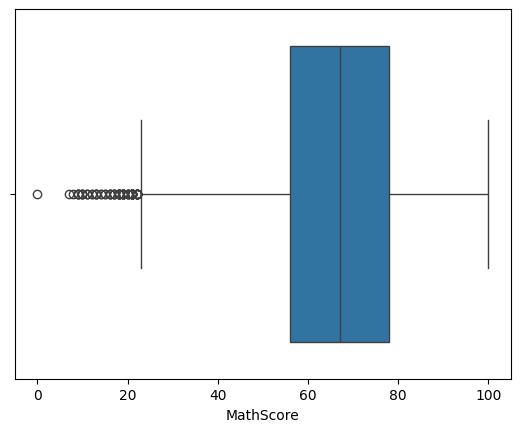

In [23]:
sns.boxplot(data = df, x = 'MathScore')
plt.show()

### Maths data has an outlier at the 0 value

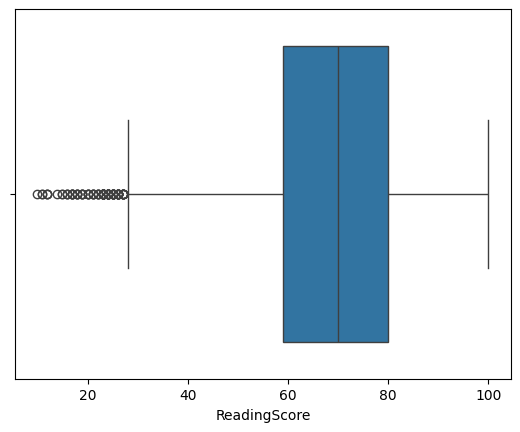

In [24]:
sns.boxplot(data = df, x = 'ReadingScore')
plt.show()

### ReadingScore data has no outlier at the 0 value

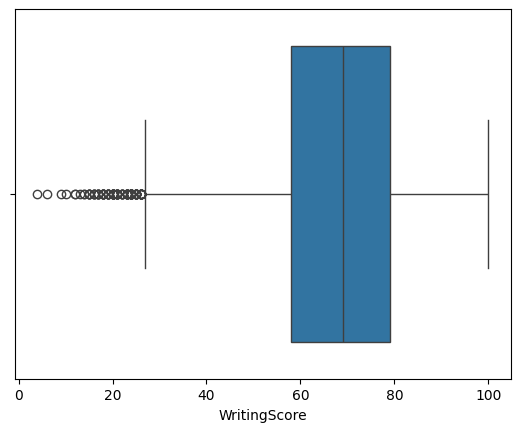

In [25]:
sns.boxplot(data = df, x = 'WritingScore')
plt.show()

### WritingScore data has no outlier at the 0 value

# Distribution of Ethnic Groups

In [27]:
print(df['EthnicGroup'].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


##### We will ignore nan group

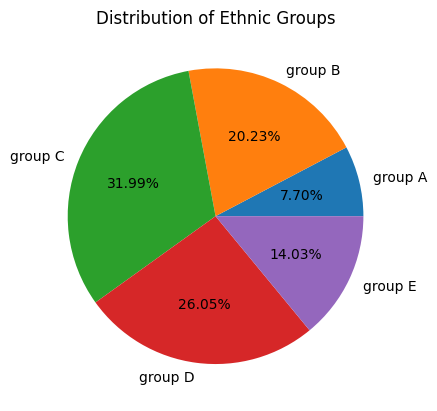

In [33]:
groupA = df.loc[(df['EthnicGroup'] == 'group A')].count()
groupB = df.loc[(df['EthnicGroup'] == 'group B')].count()
groupC = df.loc[(df['EthnicGroup'] == 'group C')].count()
groupD = df.loc[(df['EthnicGroup'] == 'group D')].count()
groupE = df.loc[(df['EthnicGroup'] == 'group E')].count()
name_list = ['group A', 'group B', 'group C', 'group D', 'group E']
group_list = [groupA['EthnicGroup'], groupB['EthnicGroup'], groupC['EthnicGroup'], groupD['EthnicGroup'], groupE['EthnicGroup']]
plt.pie(group_list, labels = name_list, autopct = '%1.2f%%')
plt.title('Distribution of Ethnic Groups')
plt.show()

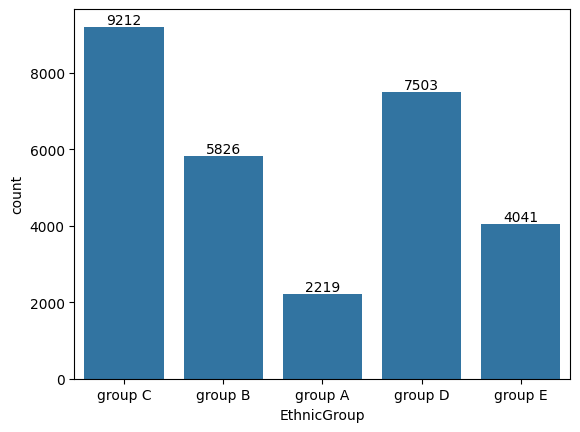

In [34]:
ax = sns.countplot(data = df, x = 'EthnicGroup')
ax.bar_label(ax.containers[0])
plt.show()

## Analysis
### According to the above analysis EthnicGroup C has the highest values.

# Impact Of SportPractice On Student Scores

In [3]:
gb2 = df.groupby('PracticeSport').agg({'MathScore' : 'mean', 'WritingScore' : 'mean', 'ReadingScore' : 'mean'})
print(gb2)

               MathScore  WritingScore  ReadingScore
PracticeSport                                       
never          64.171079     66.522727     68.337662
regularly      67.839155     69.604003     69.943019
sometimes      66.274831     68.072438     69.241307


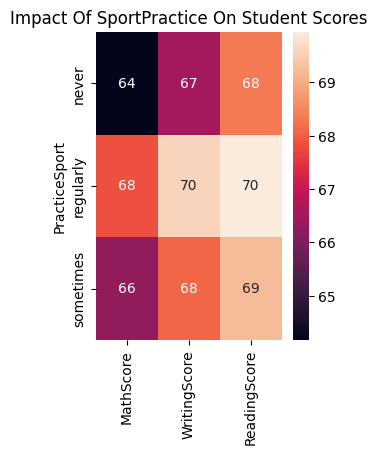

In [4]:
plt.figure(figsize=(3, 4))
sns.heatmap(gb2, annot = True)
plt.title('Impact Of SportPractice On Student Scores')
plt.show()

# Analysis
### Students who practiced sports regularly scored higher, while those who never did scored the lowest, highlighting the positive impact of sports on academic performance.

In [5]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


# Impact Of WeeklyStudyHours On Student Scores

In [7]:
gb2 = df.groupby('WklyStudyHours').agg({'MathScore' : 'mean', 'WritingScore' : 'mean', 'ReadingScore' : 'mean'})
print(gb2)

                MathScore  WritingScore  ReadingScore
WklyStudyHours                                       
5 - 10          66.870491     68.636280     69.660532
< 5             64.580359     67.090192     68.176135
> 10            68.696655     69.777778     70.365436


### Done using Seaborn

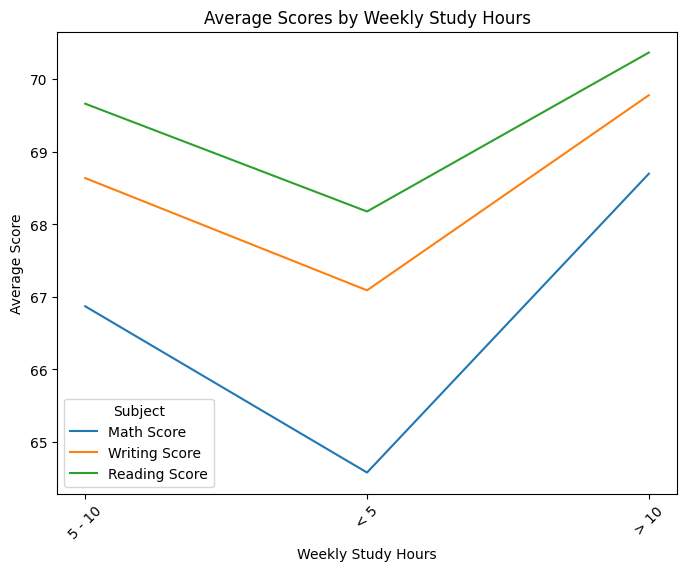

In [28]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=gb2, x='WklyStudyHours', y='MathScore', label='Math Score')
sns.lineplot(data=gb2, x='WklyStudyHours', y='WritingScore', label='Writing Score')
sns.lineplot(data=gb2, x='WklyStudyHours', y='ReadingScore', label='Reading Score')

plt.title('Average Scores by Weekly Study Hours')
plt.xlabel('Weekly Study Hours')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.legend(title='Subject')
plt.show()


### Done using Matplotlib

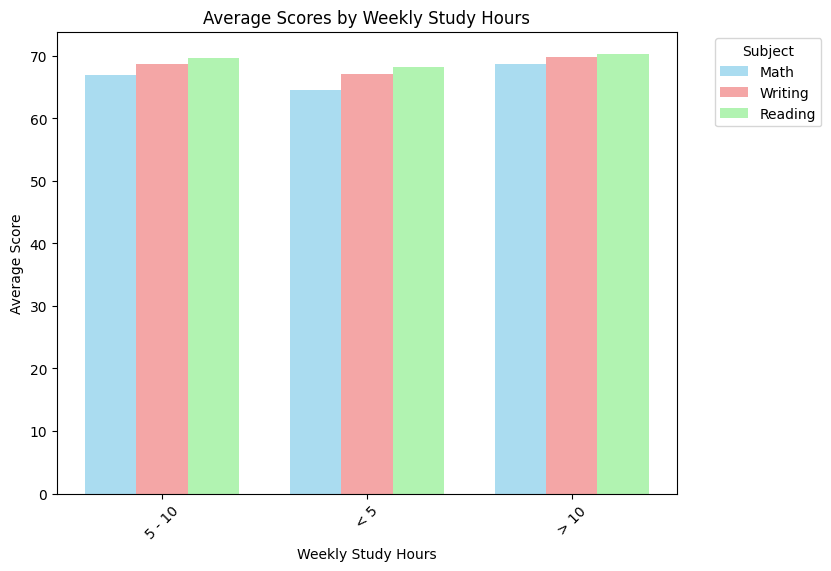

In [27]:
colors = ['skyblue', 'lightcoral', 'lightgreen']
x = np.arange(len(gb2.index))
width = 0.25
plt.figure(figsize=(8, 6))

# Plot the Math scores
plt.bar(x - width, gb2['MathScore'], width, label='Math', color=colors[0], alpha=0.7)
# Plot the Writing scores next to Math scores
plt.bar(x, gb2['WritingScore'], width, label='Writing', color=colors[1], alpha=0.7)
# Plot the Reading scores next to Writing scores
plt.bar(x + width, gb2['ReadingScore'], width, label='Reading', color=colors[2], alpha=0.7)

plt.title('Average Scores by Weekly Study Hours')
plt.xlabel('Weekly Study Hours')
plt.ylabel('Average Score')
plt.xticks(x, gb2.index, rotation=45)
plt.legend(title='Subject', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# Analysis
### Students who study for >10 hours achieve better marks than those who study for <5 hours. Students who study for 5-10 hours fall between these two groups, but there is not a big difference.

# Conclusion
### The analysis shows that female students are more prevalent and those with parents holding an master's degree score highest. Scores are similar regardless of parental marital status, with Ethnic Group C achieving the highest marks. Regular sports participation boosts academic performance, while studying over 10 hours results in better scores compared to studying less than 5 hours, with minimal difference for those studying 5-10 hours.